<a href="https://colab.research.google.com/github/Aryann29/youtube-comment-analyzer/blob/main/SAmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d kazanova/sentiment140

 99% 80.0M/80.9M [00:05<00:00, 21.1MB/s]
100% 80.9M/80.9M [00:05<00:00, 16.3MB/s]


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import re
import string
import pickle
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

STOPWORDS=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [5]:
from zipfile import ZipFile

f = '/content/sentiment140.zip'

with ZipFile(f, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
DATASET_COLUMNS=['target','ids','date','query','user','text']
DATASET_ENCODING = "ISO-8859-1"

In [7]:
df = pd.read_csv('/content/training.1600000.processed.noemoticon.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)

In [8]:
df = df[['text','target']]

In [9]:
df['target'] =df['target'].replace(4,1)

<Axes: >

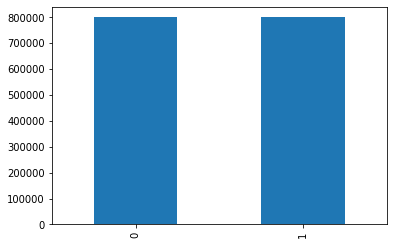

In [10]:
df['target'].value_counts().plot(kind='bar')

In [11]:
def clean_text(text):
    cleaned_text = ''
    text= text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\S+\s?', '', text)
    text = re.sub('[0-9]+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r"(.)\1\1+", r"\1\1", text)
    for i in text:
        if i.isalnum(): 
            cleaned_text += i
        else:
            cleaned_text += " "

    text_t = word_tokenize(cleaned_text)
    filtered_text = [word for word in text_t if word not in STOPWORDS]

    ps = PorterStemmer()
    stemed_words = [ps.stem(word) for word in filtered_text ]

    lm = WordNetLemmatizer()
    lemm_words = [lm.lemmatize(word,pos='a') for word in stemed_words]


    return ' '.join(lemm_words)

In [12]:
df['text'] = df['text'].apply(lambda x: clean_text(x))   

In [ ]:
df

In [14]:
X= df['text']
y= df['target']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.05, random_state = 42)
print(f'Data Split done.')

Data Split done.


In [16]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=50000)
vectoriser.fit(X_train)


TfidfVectorizer(max_features=50000, ngram_range=(1, 2))

In [17]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
model = LogisticRegression(C = 1.1)
model.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.1)

In [20]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79     39999
           1       0.78      0.82      0.80     40001

    accuracy                           0.80     80000
   macro avg       0.80      0.80      0.79     80000
weighted avg       0.80      0.80      0.79     80000



In [21]:
b= "ih hate you but you"

In [22]:
def predict(text):
    textdata = vectoriser.transform([clean_text(text)])
    sentiment = model.predict(textdata)[0]

    if sentiment == 1:
        return 'positive'
    else:
        return 'negative'
   

In [23]:
predict(b)

'negative'

In [24]:
# file = open('vectoriser-h.pkl','wb')
# pickle.dump(vectoriser, file)
# file.close()

# file = open('model-lr.pickle','wb')
# pickle.dump(model, file)
# file.close()
